In [1]:
import pandas as pd
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [2]:
register_matplotlib_converters()
sns.set()

# Load data.

## Load a sub-sample of the data.

In [3]:
df_q = pd.read_csv('./Data/RENA.PA/2017-01-02-RENA.PA-quotes.csv.gz', index_col = 0)

In [4]:
df_t = pd.read_csv('./Data/RENA.PA/2017-01-02-RENA.PA-trades.csv.gz', index_col = 0)

In [5]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,ap8,aq8,bp9,bq9,ap9,aq9,bp10,bq10,ap10,aq10
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,84.41,700,84.1,700,84.42,75,84.09,55,84.44,55
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,84.41,700,84.1,700,84.42,75,84.09,55,84.44,55
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.41,700,84.1,700,84.42,75,84.09,55,84.44,55
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.41,700,84.1,700,84.42,75,84.09,55,84.44,55
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,84.40,200,84.1,700,84.41,700,84.09,55,84.42,75


In [6]:
df_t.head()

,ts,price,volume
0,2017-01-02 09:01:15.893,84.31,90
1,2017-01-02 09:01:15.893,84.31,10
2,2017-01-02 09:01:18.813,84.31,12
3,2017-01-02 09:01:52.432,84.31,38
4,2017-01-02 09:01:52.452,84.31,62


# 1\  Multiple prices.   

Plot the bid price, ask price, mid price and weighted mid-price on a few
minutes of the sample.

## Compute the mid-price.

In [7]:
df_q['mid price'] = (df_q['bp1'] + df_q['ap1']) * .5

## Compute the weighted mid-price.

In [8]:
df_q['weighted mid price'] = (df_q['bp1'] * df_q['aq1'] + df_q['ap1'] * df_q['bq1']) / (df_q['bq1'] + df_q['aq1'])

In [9]:
df_q['ask price'] = df_q['ap1']
df_q['bid price'] = df_q['bp1']
#df_q = df_q.rename(columns = {'ap1': 'ask price', 'bp1': 'bid price'})

## Final plot.

<AxesSubplot: title={'center': 'Bid price and Ask price for each available observations.'}, xlabel='Available observations', ylabel='Price in Euros'>

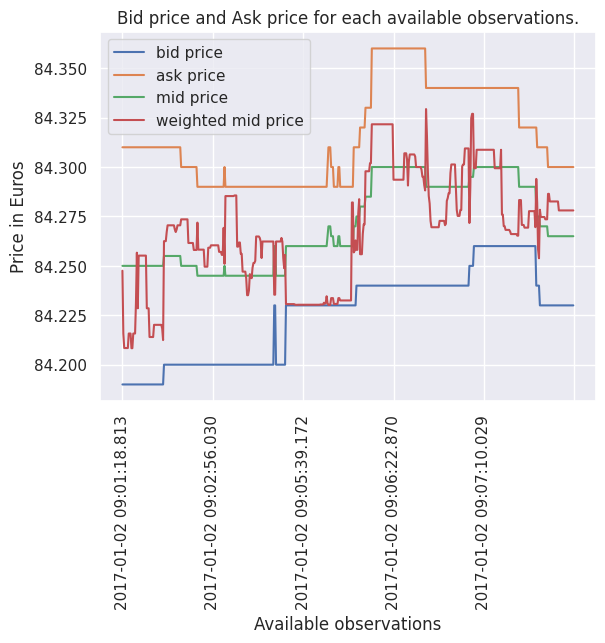

In [10]:
df_q[:500].plot(x = 'ts', 
             y = ['bid price', 'ask price', 'mid price', 'weighted mid price'], 
             kind = 'line',
             title = 'Bid price and Ask price for each available observations.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             )

One can clearly see the jumps that correspond to some integer times the tick size. The weighted mid-price, however, does not move by a integer number of tick size since it is a convex combination of the bid and ask prices. It can change without the ask and bid prices when some ask or bid volume is added or removed.

# 2\ Spread distribution.

In [11]:
df_q['spread'] = df_q['ask price'] - df_q['bid price'] 

## Plot in event time.

<AxesSubplot: title={'center': 'Empirical distribution of the spread in event time.'}, ylabel='Frequency'>

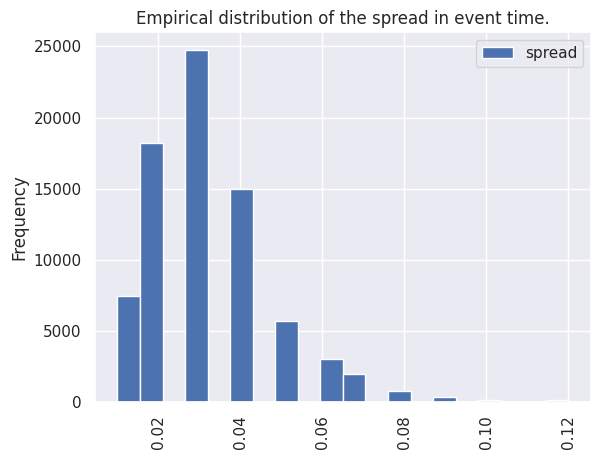

In [12]:
df_q.plot(y = ['spread'], 
             kind = 'hist',
             title = 'Empirical distribution of the spread in event time.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             bins = 20 #TODO change the bins.
             )

This empirical distribution is consistent with that presented in the course, the shape is roughly the same. One can infer that the tick size is close to 0.01 .

## Plot in calendar time.

In [13]:
df_q.isna().any().any()

False

In [14]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,aq9,bp10,bq10,ap10,aq10,mid price,weighted mid price,ask price,bid price,spread
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,75,84.09,55,84.44,55,84.25,84.247534,84.31,84.19,0.12
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,75,84.09,55,84.44,55,84.25,84.215767,84.31,84.19,0.12
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,75,84.09,55,84.44,55,84.25,84.208421,84.31,84.19,0.12
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,75,84.09,55,84.44,55,84.25,84.208421,84.31,84.19,0.12
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,700,84.09,55,84.42,75,84.25,84.208421,84.31,84.19,0.12


In [15]:
df_q.dtypes

ts                     object
bp1                   float64
bq1                     int64
ap1                   float64
aq1                     int64
bp2                   float64
bq2                     int64
ap2                   float64
aq2                     int64
bp3                   float64
bq3                     int64
ap3                   float64
aq3                     int64
bp4                   float64
bq4                     int64
ap4                   float64
aq4                     int64
bp5                   float64
bq5                     int64
ap5                   float64
aq5                     int64
bp6                   float64
bq6                     int64
ap6                   float64
aq6                     int64
bp7                   float64
bq7                     int64
ap7                   float64
aq7                     int64
bp8                   float64
bq8                     int64
ap8                   float64
aq8                     int64
bp9       

In [16]:
df_q['ts'] = pd.to_datetime(df_q['ts'])

In [17]:
df_q['duration'] = (df_q['ts'] - df_q['ts'].shift()).dt.total_seconds()

In [18]:
df_q['weighted spread'] = df_q['spread'] * df_q['duration'] 

<AxesSubplot: title={'center': 'Empirical distribution of the spread in calendar time.'}, ylabel='Frequency'>

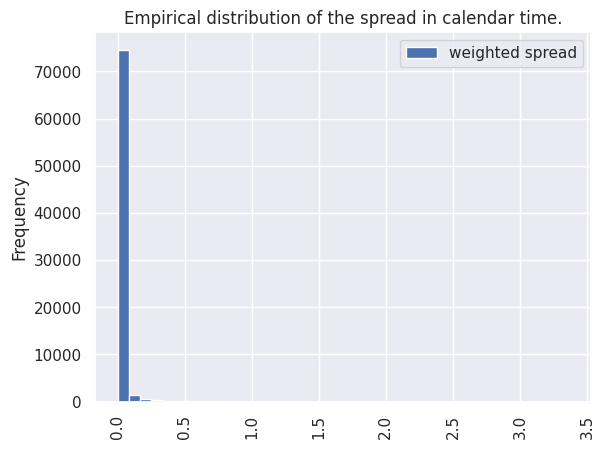

In [19]:
df_q.plot(y = ['weighted spread'], 
             kind = 'hist',
             title = 'Empirical distribution of the spread in calendar time.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             bins = 40 #TODO change the bins.
             )

This time, by weighting by the duration of the event, one can see that almost all of the mass is on the first tick size. This mesure is more appropriate to see what really happens in practice; indeed even if sometimes the spread can be more than 5 times the tick size in event time, this does not last long at all, and these are due to transition. On average in time, it is almost all the time one tick size long. Therefore it is rather a 'large tick stock'.

The shapes of the two graphs above are consistent with that of the course.

# 3\ Imbalance and trading activity.

## Compute the imbalance.

In [20]:
df_q['imbalance'] = (df_q['bq1'] - df_q['aq1']) / (df_q['bq1'] + df_q['aq1'])

## Compute the mid-price move each times it moves in percentage.

In [21]:
df_q['mid price move'] = df_q['mid price'].pct_change()

In [22]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,aq10,mid price,weighted mid price,ask price,bid price,spread,duration,weighted spread,imbalance,mid price move
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,55,84.25,84.247534,84.31,84.19,0.12,NaN,NaN,-0.041096,NaN
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,55,84.25,84.215767,84.31,84.19,0.12,0.00,0.0000,-0.570552,0.0
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.25,84.208421,84.31,84.19,0.12,1.08,0.1296,-0.692982,0.0
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.25,84.208421,84.31,84.19,0.12,0.66,0.0792,-0.692982,0.0
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,75,84.25,84.208421,84.31,84.19,0.12,0.00,0.0000,-0.692982,0.0


# Plot.

<AxesSubplot: title={'center': 'Mid price move as a function of the imbalance.'}, xlabel='Imbalance', ylabel='Price in Euros'>

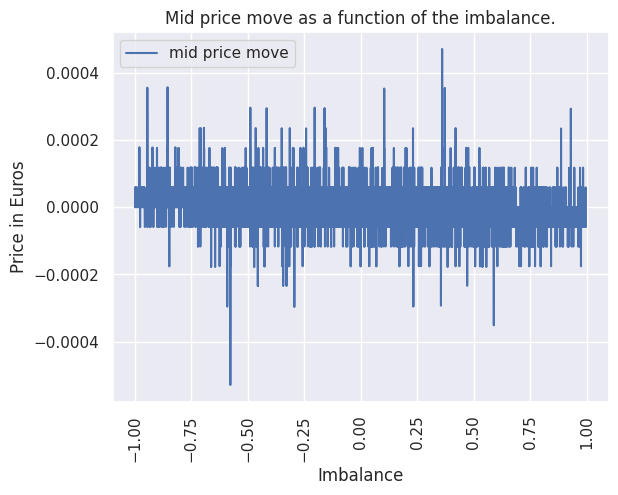

In [23]:
df_q.sort_values(by = 'imbalance', 
                 ascending=True, 
                 inplace=False, 
                 kind='heapsort').plot(x = 'imbalance', 
                                        y = ['mid price move'], 
                                        #use_index = False,
                                        kind = 'line',
                                        title = 'Mid price move as a function of the imbalance.',
                                        grid = True,
                                        legend = True,
                                        xlabel = 'Imbalance',
                                        ylabel = 'Price in Euros',
                                        rot = 90,
                                        )

We do not really see something here, the price movements are not really due to the imbalance. Perhaps it will be more obvious with the weigthed mid price, since the volumes appears in both the imbalance and the weighted mid price formula.

In [24]:
df_q['weighted mid price move'] = df_q['weighted mid price'].pct_change() * 100

<AxesSubplot: title={'center': 'Weighted mid price move as a function of the imbalance.'}, xlabel='Imbalance', ylabel='Price in Euros'>

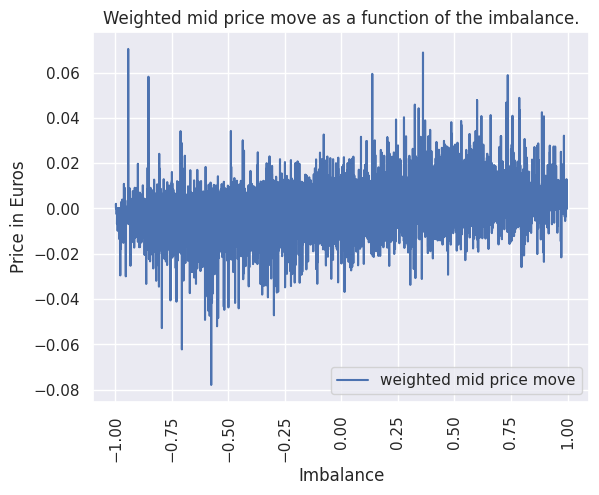

In [25]:
df_q.sort_values(by = 'imbalance', 
                 ascending=True, 
                 inplace=False, 
                 kind='heapsort').plot(x = 'imbalance', 
                                        y = ['weighted mid price move'], 
                                        #use_index = False,
                                        kind = 'line',
                                        title = 'Weighted mid price move as a function of the imbalance.',
                                        grid = True,
                                        legend = True,
                                        xlabel = 'Imbalance',
                                        ylabel = 'Price in Euros',
                                        rot = 90,
                                        )

One can see a slight increasing trend, since the curve is crossing some horizontal lines of the grid. However it is still very noisy. The trend is positive which makes sense from an economical point of view.

# 4\ Autocorrelations of the signs.

## Compute the signs using a tick test.

In [26]:
df_t.head(20)

,ts,price,volume
0,2017-01-02 09:01:15.893,84.31,90
1,2017-01-02 09:01:15.893,84.31,10
2,2017-01-02 09:01:18.813,84.31,12
3,2017-01-02 09:01:52.432,84.31,38
4,2017-01-02 09:01:52.452,84.31,62
5,2017-01-02 09:02:59.009,84.29,60
6,2017-01-02 09:02:59.009,84.29,64
7,2017-01-02 09:03:49.157,84.29,11
8,2017-01-02 09:05:11.114,84.23,1
9,2017-01-02 09:06:15.871,84.29,25


The 'up' column contains 'True' iff the price went up. The same goes for 'down'.

In [27]:
df_t['up'] = (df_t['price'].diff() > 0) 
df_t['down'] = (df_t['price'].diff() < 0) 

In [28]:
df_t.head()

,ts,price,volume,up,down
0,2017-01-02 09:01:15.893,84.31,90,False,False
1,2017-01-02 09:01:15.893,84.31,10,False,False
2,2017-01-02 09:01:18.813,84.31,12,False,False
3,2017-01-02 09:01:52.432,84.31,38,False,False
4,2017-01-02 09:01:52.452,84.31,62,False,False


In [29]:
df_t['sign'] = df_t.apply(lambda row: 1 if row['up'] else (-1 if row['down'] else np.NaN), axis = 1)

In [30]:
df_t.head(14)

,ts,price,volume,up,down,sign
0,2017-01-02 09:01:15.893,84.31,90,False,False,NaN
1,2017-01-02 09:01:15.893,84.31,10,False,False,NaN
2,2017-01-02 09:01:18.813,84.31,12,False,False,NaN
3,2017-01-02 09:01:52.432,84.31,38,False,False,NaN
4,2017-01-02 09:01:52.452,84.31,62,False,False,NaN
5,2017-01-02 09:02:59.009,84.29,60,False,True,-1.0
6,2017-01-02 09:02:59.009,84.29,64,False,False,NaN
7,2017-01-02 09:03:49.157,84.29,11,False,False,NaN
8,2017-01-02 09:05:11.114,84.23,1,False,True,-1.0
9,2017-01-02 09:06:15.871,84.29,25,True,False,1.0


In [31]:
df_t['sign'] = df_t['sign'].fillna(method = 'ffill')

In [32]:
df_t.head(7)

,ts,price,volume,up,down,sign
0,2017-01-02 09:01:15.893,84.31,90,False,False,NaN
1,2017-01-02 09:01:15.893,84.31,10,False,False,NaN
2,2017-01-02 09:01:18.813,84.31,12,False,False,NaN
3,2017-01-02 09:01:52.432,84.31,38,False,False,NaN
4,2017-01-02 09:01:52.452,84.31,62,False,False,NaN
5,2017-01-02 09:02:59.009,84.29,60,False,True,-1.0
6,2017-01-02 09:02:59.009,84.29,64,False,False,-1.0


In [33]:
print(df_t.shape[0])
df_t = df_t.dropna(axis = 0)
print(df_t.shape[0])

2380
2375


## Autocorrelation.

In [34]:
num_autocorrs = 15

In [35]:
autocorrs = [df_t['sign'].autocorr(lag = i) for i in range(num_autocorrs)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


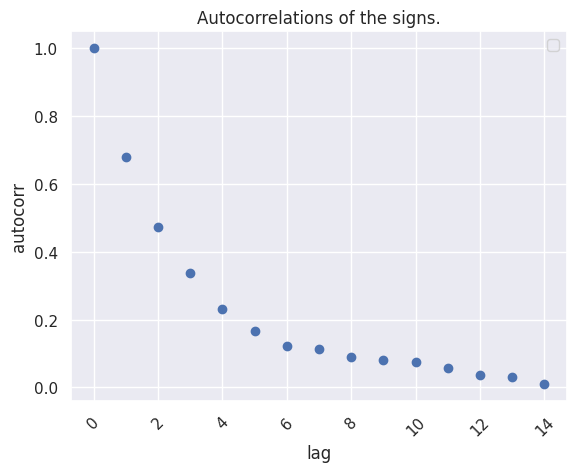

In [36]:
fig, ax = plt.subplots()
ax.scatter(list(range(num_autocorrs)), autocorrs, c = 'b')
ax.set_title('Autocorrelations of the signs.')
ax.set_ylabel('autocorr')
ax.set_xlabel('lag')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)
ax.legend()

These autocorrelations are very high, which is line with the course, and results from some stylized facts, like consensus reinforcement and momentum effects. 

# 5\ Average shape of the LOB.

In [37]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,mid price,weighted mid price,ask price,bid price,spread,duration,weighted spread,imbalance,mid price move,weighted mid price move
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,84.25,84.247534,84.31,84.19,0.12,NaN,NaN,-0.041096,NaN,NaN
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,84.25,84.215767,84.31,84.19,0.12,0.00,0.0000,-0.570552,0.0,-0.037707
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,1.08,0.1296,-0.692982,0.0,-0.008723
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.66,0.0792,-0.692982,0.0,0.000000
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.00,0.0000,-0.692982,0.0,0.000000


In [38]:
df_avg_shape = df_q.mean(axis = 0)[:40]

/tmp/ipykernel_203216/704866797.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_avg_shape = df_q.mean(axis = 0)[:40]


In [39]:
df_avg_shape

bp1      85.164286
bq1     289.613282
ap1      85.196612
aq1     306.138792
bp2      85.153698
bq2     501.467305
ap2      85.207252
aq2     523.414295
bp3      85.143649
bq3     573.256300
ap3      85.217324
aq3     597.773436
bp4      85.133633
bq4     550.582228
ap4      85.227335
aq4     615.678246
bp5      85.123620
bq5     498.190845
ap5      85.237340
aq5     575.227353
bp6      85.113616
bq6     388.433447
ap6      85.247357
aq6     478.455506
bp7      85.103601
bq7     365.808017
ap7      85.257374
aq7     459.326433
bp8      85.093590
bq8     441.751092
ap8      85.267399
aq8     502.980305
bp9      85.083575
bq9     537.865214
ap9      85.277417
aq9     594.820268
bp10     85.073554
bq10    493.476131
ap10     85.287478
aq10    541.672831
dtype: float64

In [40]:
df_bid_q = df_avg_shape.iloc[1::4][::-1]
df_bid_q

bq10    493.476131
bq9     537.865214
bq8     441.751092
bq7     365.808017
bq6     388.433447
bq5     498.190845
bq4     550.582228
bq3     573.256300
bq2     501.467305
bq1     289.613282
dtype: float64

In [41]:
df_ask_q = df_avg_shape.iloc[3::4]
df_ask_q

aq1     306.138792
aq2     523.414295
aq3     597.773436
aq4     615.678246
aq5     575.227353
aq6     478.455506
aq7     459.326433
aq8     502.980305
aq9     594.820268
aq10    541.672831
dtype: float64

In [42]:
df_bid_p = df_avg_shape.iloc[0::4][::-1]
df_bid_p

bp10    85.073554
bp9     85.083575
bp8     85.093590
bp7     85.103601
bp6     85.113616
bp5     85.123620
bp4     85.133633
bp3     85.143649
bp2     85.153698
bp1     85.164286
dtype: float64

In [43]:
df_ask_p = df_avg_shape.iloc[2::4]
df_ask_p

ap1     85.196612
ap2     85.207252
ap3     85.217324
ap4     85.227335
ap5     85.237340
ap6     85.247357
ap7     85.257374
ap8     85.267399
ap9     85.277417
ap10    85.287478
dtype: float64

In [44]:
df_ask_p.to_list()

[85.19661161510427,
 85.2072515572097,
 85.21732444237676,
 85.22733516838541,
 85.23733994985913,
 85.24735739577679,
 85.25737432477837,
 85.26739861983407,
 85.27741722881288,
 85.28747783722312]

In [45]:
approximate_tick_size = df_bid_p[1] - df_bid_p[0]
approximate_tick_size

0.010021064330231866

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


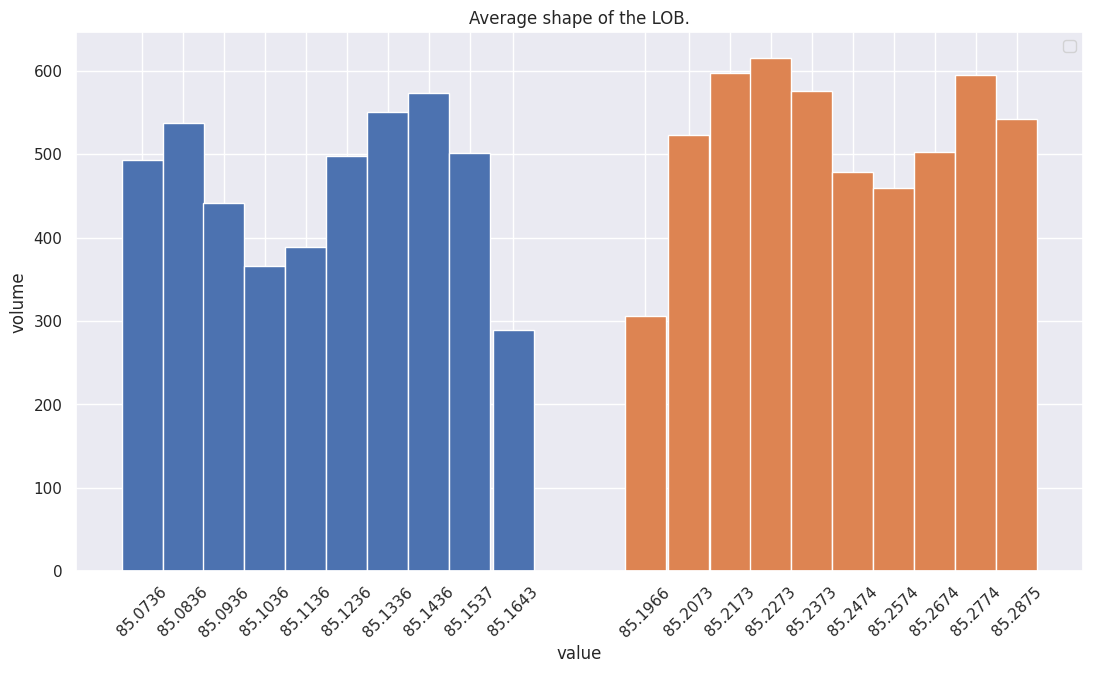

In [46]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.bar(x = df_bid_p.to_list(), 
        height = df_bid_q.to_list(),
        width = approximate_tick_size)
ax.bar(x = df_ask_p.to_list(), 
        height = df_ask_q.to_list(),
        width = approximate_tick_size)
ax.set_title('Average shape of the LOB.')
ax.set_ylabel('volume')
ax.set_xlabel('value')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xticks(df_bid_p.to_list() + df_ask_p.to_list())
ax.grid(True)
ax.legend()

This average shape seems rather symetrical, and in line with what has been said in the course.

## The same in calendar time.

In [47]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,mid price,weighted mid price,ask price,bid price,spread,duration,weighted spread,imbalance,mid price move,weighted mid price move
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,84.25,84.247534,84.31,84.19,0.12,NaN,NaN,-0.041096,NaN,NaN
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,84.25,84.215767,84.31,84.19,0.12,0.00,0.0000,-0.570552,0.0,-0.037707
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,1.08,0.1296,-0.692982,0.0,-0.008723
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.66,0.0792,-0.692982,0.0,0.000000
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.00,0.0000,-0.692982,0.0,0.000000


The first row with NaNs is droped and the dataframe is truncated and converted in a lighter type to avoid the MemoryError. 

In [48]:
df_q = df_q.drop(0)

In [52]:
df_q.head()

,ts,bp1,bq1,ap1,aq1,bp2,bq2,ap2,aq2,bp3,...,mid price,weighted mid price,ask price,bid price,spread,duration,weighted spread,imbalance,mid price move,weighted mid price move
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,84.25,84.215767,84.31,84.19,0.12,0.00,0.0000,-0.570552,0.0,-0.037707
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,1.08,0.1296,-0.692982,0.0,-0.008723
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.66,0.0792,-0.692982,0.0,0.000000
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.00,0.0000,-0.692982,0.0,0.000000
5,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,84.25,84.208421,84.31,84.19,0.12,0.00,0.0000,-0.692982,0.0,0.000000


In [85]:
df_q_calendar = df_q.iloc[:,1:].astype('float32')

In [86]:
df_q_calendar = df_q_calendar[[e + str(i) for e in ['bq', 'bp', 'aq', 'ap'] for i in range(1,11)]].multiply(df_q_calendar['duration'], axis = 'index')
df_q_calendar.head()

,bq1,bq2,bq3,bq4,bq5,bq6,bq7,bq8,bq9,bq10,...,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,37.800003,37.800003,154.440002,115.560005,54.000004,221.400009,178.200012,113.400002,756.000000,59.400002,...,91.054802,91.087196,91.098000,91.108803,91.130402,91.141205,91.152008,91.162811,91.173599,91.195206
3,23.100000,23.100000,59.400002,70.620003,33.000000,135.300003,108.900002,69.300003,462.000031,36.300003,...,55.644600,55.664398,55.671001,55.677601,55.690800,55.697403,55.704002,55.710606,55.717201,55.730404
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
df_avg_shape = df_q_calendar.astype('float32').mean(axis = 0)[:40]
df_avg_shape

bq1     122.874542
bq2     228.519714
bq3     250.725922
bq4     231.414810
bq5     214.813034
bq6     156.636520
bq7     141.885742
bq8     188.125107
bq9     257.833588
bq10    218.661865
bp1      33.590897
bp2      33.586800
bp3      33.582836
bp4      33.578896
bp5      33.574944
bp6      33.571003
bp7      33.567036
bp8      33.563084
bp9      33.559135
bp10     33.555195
aq1     136.141190
aq2     244.632965
aq3     254.117783
aq4     266.104797
aq5     258.558197
aq6     192.710114
aq7     185.273071
aq8     217.231796
aq9     278.586456
aq10    233.556351
ap1      33.602913
ap2      33.606972
ap3      33.610939
ap4      33.614880
ap5      33.618832
ap6      33.622780
ap7      33.626724
ap8      33.630669
ap9      33.634613
ap10     33.638561
dtype: float32

In [88]:
df_bid_q = df_avg_shape.iloc[0:10][::-1]
df_bid_q

bq10    218.661865
bq9     257.833588
bq8     188.125107
bq7     141.885742
bq6     156.636520
bq5     214.813034
bq4     231.414810
bq3     250.725922
bq2     228.519714
bq1     122.874542
dtype: float32

In [90]:
df_ask_q = df_avg_shape.iloc[20:30]
df_ask_q

aq1     136.141190
aq2     244.632965
aq3     254.117783
aq4     266.104797
aq5     258.558197
aq6     192.710114
aq7     185.273071
aq8     217.231796
aq9     278.586456
aq10    233.556351
dtype: float32

In [91]:
df_bid_p = df_avg_shape.iloc[10:20][::-1]
df_bid_p

bp10    33.555195
bp9     33.559135
bp8     33.563084
bp7     33.567036
bp6     33.571003
bp5     33.574944
bp4     33.578896
bp3     33.582836
bp2     33.586800
bp1     33.590897
dtype: float32

In [92]:
df_ask_p = df_avg_shape.iloc[30:40]
df_ask_p

ap1     33.602913
ap2     33.606972
ap3     33.610939
ap4     33.614880
ap5     33.618832
ap6     33.622780
ap7     33.626724
ap8     33.630669
ap9     33.634613
ap10    33.638561
dtype: float32

In [93]:
approximate_tick_size = df_bid_p[1] - df_bid_p[0]
approximate_tick_size

0.0039405823

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


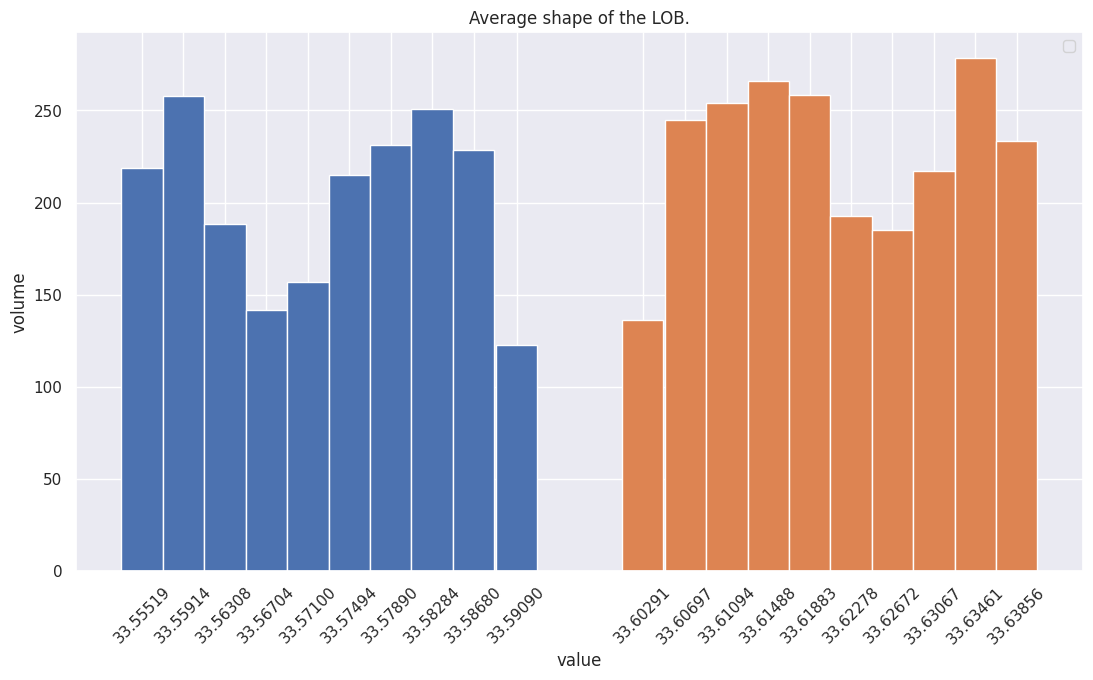

In [94]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.bar(x = df_bid_p.to_list(), 
        height = df_bid_q.to_list(),
        width = approximate_tick_size)
ax.bar(x = df_ask_p.to_list(), 
        height = df_ask_q.to_list(),
        width = approximate_tick_size)
ax.set_title('Average shape of the LOB.')
ax.set_ylabel('volume')
ax.set_xlabel('value')
ax.xaxis.set_tick_params(rotation=45)
ax.set_xticks(df_bid_p.to_list() + df_ask_p.to_list())
ax.grid(True)
ax.legend()

In calendar time, one gets roughly the same shape. Only the scale and the units are impacted.